In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
# خواندن داده‌ها
grade_math = pd.read_csv('uk_math_scores_dataset.csv')

In [3]:
# انتخاب ویژگی‌های عددی (در اینجا فقط Grade)
X = grade_math[['Math_Score']].values

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ایجاد و آموزش مدل GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_scaled)

# محاسبه لگاریتم احتمال برای هر نمونه
log_probs = gmm.score_samples(X_scaled)

In [4]:
# تعیین آستانه برای شناسایی داده‌های پرت (چندک پایین)
threshold = np.quantile(log_probs, 0.05)  # 5% پایین‌ترین احتمالات به عنوان پرت در نظر گرفته می‌شوند
outliers = log_probs < threshold

# افزودن ستون‌های جدید به داده‌ها
grade_math['Log_Probability'] = log_probs
grade_math['Is_Outlier'] = outliers

In [5]:
# نمایش داده‌های پرت
print("\nتعداد داده‌های پرت شناسایی شده:", sum(outliers))
print("\nنمونه‌ای از داده‌های پرت:")
print(grade_math[grade_math['Is_Outlier'] == True].sort_values('Math_Score'))


تعداد داده‌های پرت شناسایی شده: 15

نمونه‌ای از داده‌های پرت:
                Name  Gender Class  Math_Score  Log_Probability  Is_Outlier
158      Oscar Clark    Male    7A         1.5        -8.066270        True
172      Logan Moore    Male    7C         4.4        -5.745945        True
51        Ruby Allen  Female    7B         5.1        -5.280815        True
218       Jack White    Male    7D         6.2        -4.623877        True
241     George Scott    Male    7C         6.6        -4.406803        True
175    Charlie Smith    Male    7B         6.7        -4.354259        True
148     Alfie Garcia    Male    7A         7.5        -3.955993        True
70       Freya Lewis  Female    7B         7.8        -3.814688        True
84   Alexander Moore    Male    7C         8.9        -3.298712        True
115   Rosie Anderson  Female    7D        19.2        -3.574577        True
213     George Brown    Male    7C        19.2        -3.574577        True
291      Jacob Clark    M

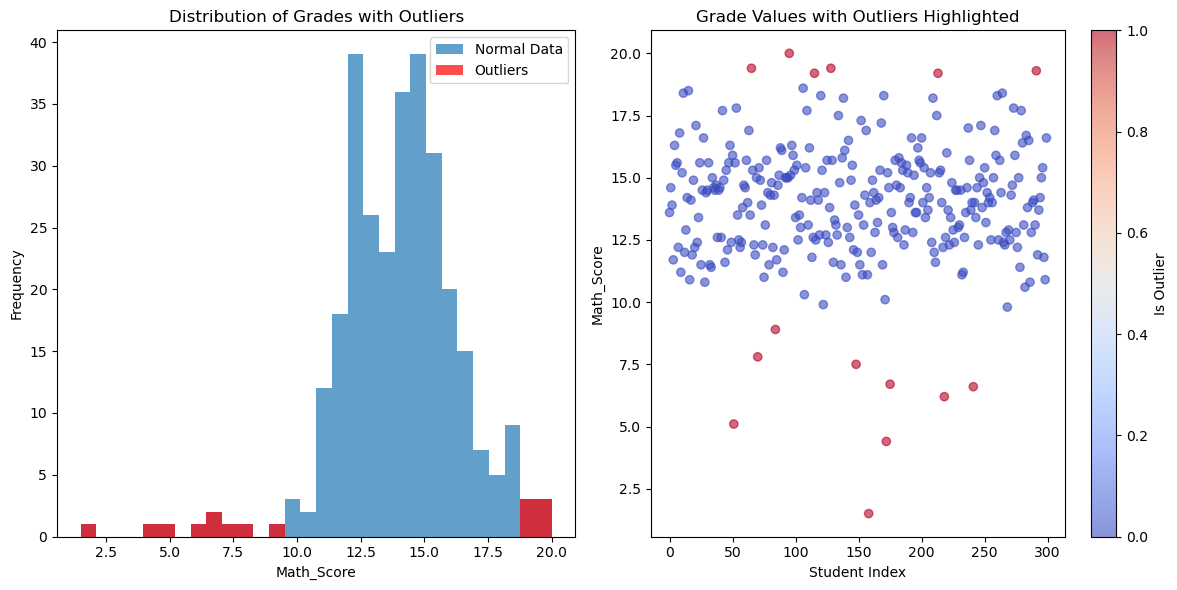

In [6]:
# نمایش بصری
plt.figure(figsize=(12, 6))

# هیستوگرام نمرات با مشخص کردن داده‌های پرت
plt.subplot(1, 2, 1)
plt.hist(grade_math['Math_Score'], bins=30, alpha=0.7, label='Normal Data')
plt.hist(grade_math[grade_math['Is_Outlier']]['Math_Score'], bins=30, color='red', alpha=0.7, label='Outliers')
plt.xlabel('Math_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Grades with Outliers')
plt.legend()

# نمایش پراکندگی نمرات با مشخص کردن داده‌های پرت
plt.subplot(1, 2, 2)
plt.scatter(range(len(grade_math)), grade_math['Math_Score'], c=grade_math['Is_Outlier'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Student Index')
plt.ylabel('Math_Score')
plt.title('Grade Values with Outliers Highlighted')
plt.colorbar(label='Is Outlier')

plt.tight_layout()
plt.show()

In [7]:
grade_math.to_csv('uk_student_dataset_with_outliers.csv', index=False)